# Exploratory Data Analysis.

* Exploring the dataset to see what we're dealing with here.

### Step 1: Loading the modules and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
pd.options.display.max_columns = 32
plt.style.use('fivethirtyeight')

In [2]:
xg1 = pd.read_csv('xgdata.csv') # df to add features to main df
xg = pd.read_csv('finalxgdata.csv') # main df to use

#adding some features for visual EDA
xg['shotX'],xg['shotY']=xg1['shotX'],xg1['distY']

# adding some noise to better visualise the shots
list1 = np.random.rand(len(xg))
list2 = np.random.rand(len(xg))
list1 = list1 - 0.5
list2 = list2 - 0.5
xg1['list1'] = list1
xg1['list2'] = list2
xg1['list3'] = 12*np.ones(len(xg))
xg['shotX'],xg['shotY']=xg['shotX']+xg1['list1'],xg['shotY']+xg1['list2']
xg['shotY'] = xg1['list3'] - xg['shotY']

# adding a 'minute' feature to add another layer of analysis
xg1['minute']=xg1.Click.str[:2].astype(int)

# test code
# dftest = xg[xg['shotDist'] > 6 ]
# dftest.head(30)

In [3]:
# calculating goalface coordinates for plotting shots on the goal.

keys = ['s{}'.format(i) for i in range(1, 25)]
keys1 = ['OT {}'.format(i) for i in range(1, 9)]
for item in keys1:
    keys.append(item)
    
values = []
values1 = [[_,4] for _ in range(1,7)]
values2 = [[_,3] for _ in range(1,7)]
values3 = [[_,2] for _ in range(1,7)]
values4 = [[_,1] for _ in range(1,7)]
values5 = [[-1,1.5],[-1,3.5],[-1,5],[2,5],[5,5],[8,5],[8,3.5],[8,1.5]]

for _ in values1,values2,values3,values4,values5:
    values.append(_)

valuesf = []
for x in range(0,5):
    for item in values[x]:
        valuesf.append(item)

goalDict = dict(zip(keys, valuesf))
xg1['goalLoc1'] = xg1['goalLoc'].apply(lambda _: goalDict[_])

#adding some noise
listf = [list(x) for x in zip(list1,list2)]
xg1['listf'] = listf         
xg1['goalLoc2'] = xg1.apply(lambda row: [row.goalLoc1[0] + row.listf[0], 5 - row.goalLoc1[1] + row.listf[1]], axis=1)
xg.head()


,shotDist,shotAng,isOnTarget,isGoal,isHeader,isBigChance,isCounter,isTapIn,isThroughball,isGround,goalLoc,minute,shotX,shotY
0,8.000000,90.000000,1,1,0,0,0,0,0,0,s11,53,5.114804,3.891741
1,2.236068,63.434949,1,1,0,0,0,0,0,1,s17,54,6.139606,9.988723
2,4.472136,63.434949,1,0,0,0,0,0,0,1,s21,54,7.410502,7.844145
3,4.123106,75.963757,1,0,0,0,0,0,0,1,s16,55,4.224176,8.258125
4,3.000000,90.000000,1,0,0,0,0,0,1,1,s21,55,5.312272,9.262790


### Step 2: Preliminary data analysis.

In [4]:
xg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shotDist       479 non-null    float64
 1   shotAng        479 non-null    float64
 2   isOnTarget     479 non-null    int64  
 3   isGoal         479 non-null    int64  
 4   isHeader       479 non-null    int64  
 5   isBigChance    479 non-null    int64  
 6   isCounter      479 non-null    int64  
 7   isTapIn        479 non-null    int64  
 8   isThroughball  479 non-null    int64  
 9   isGround       479 non-null    int64  
 10  goalLoc        479 non-null    object 
 11  minute         479 non-null    int64  
 12  shotX          479 non-null    float64
 13  shotY          479 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 52.5+ KB


In [5]:
xg.describe()

,shotDist,shotAng,isOnTarget,isGoal,isHeader,isBigChance,isCounter,isTapIn,isThroughball,isGround,minute,shotX,shotY
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,3.238865,66.581632,0.772443,0.475992,0.012526,0.171190,0.008351,0.052192,0.064718,0.665971,42.425887,4.974337,9.172508
std,1.511583,17.651181,0.419694,0.499945,0.111333,0.377069,0.091095,0.222647,0.246285,0.472143,19.515958,1.647238,1.483878
min,1.000000,18.434949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.538800,0.962376
25%,2.236068,56.309932,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.500000,3.863615,8.631401
50%,3.000000,63.434949,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,48.000000,5.126508,9.434502
75%,4.061553,85.934949,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,57.000000,6.141367,10.132057
max,11.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,73.000000,9.190398,11.476564


### Step 3: Identifying the Dependent and Independent Features.

* First, we use the variance inflation factor which helps measure multicolinearity between the predictor features.
* We then take a closer look at the features that inflate the variance most and drop them from our predictor variables.
* For this analysis, we will be dropping isGoal (final prediction), and goalLoc (categorical).

In [6]:
X = xg.drop(['isGoal','goalLoc'], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

         features  vif_factor
0        shotDist    5.776657
1         shotAng   13.530564
2      isOnTarget    4.763844
3        isHeader    1.036535
4     isBigChance    1.616730
5       isCounter    1.024749
6         isTapIn    1.330780
7   isThroughball    1.140280
8        isGround    3.271775
9          minute    5.869970
10          shotX   10.316509
11          shotY   16.988386


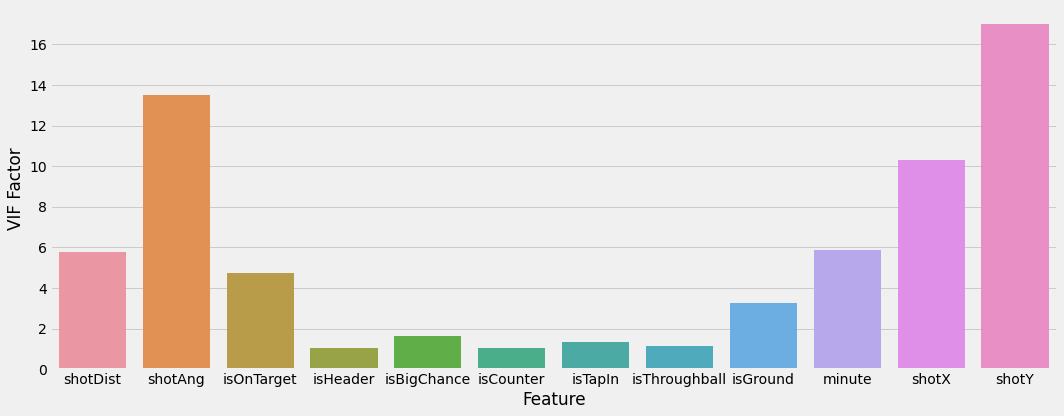

In [7]:
fig = plt.figure(figsize=(15,6))
sns.barplot(x='features',y='vif_factor',data=vif)
plt.ylabel('VIF Factor')
plt.xlabel('Feature')
plt.tight_layout();
plt.savefig('vif_factor.png')

From the above table, we see that shotY, shotX and shotAng showcase slight colinearity. This makes sense as shot Distance and shot angle are calculated using the shot's X and Y coordinates. We shall proceed by removing either shotX and shotY, or shotDist and shotAng. Let's see how the VIF factor is affected by dropping the columns in both cases.

#### Case 1: Dropping shotAng and shotDist.

In [8]:
X1 = X.drop(['shotAng','shotDist'], axis=1)
vif1 = pd.DataFrame()
vif1["features"] = X1.columns
vif1["vif_factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print(vif1)

        features  vif_factor
0     isOnTarget    4.599151
1       isHeader    1.035289
2    isBigChance    1.551532
3      isCounter    1.024235
4        isTapIn    1.304351
5  isThroughball    1.126395
6       isGround    3.000165
7         minute    5.039954
8          shotX    8.990233
9          shotY   14.218751


We see here that shotY's VIF factor is still above 10, and shotX is at ~9 which is at the higher end of our exceptions.


#### Case 2: Dropping shotX and shotY.

In [9]:
X2 = X.drop(['shotX','shotY'], axis=1)
vif2 = pd.DataFrame()
vif2["features"] = X2.columns
vif2["vif_factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif2)

        features  vif_factor
0       shotDist    5.473724
1        shotAng    9.246917
2     isOnTarget    4.162965
3       isHeader    1.024959
4    isBigChance    1.603932
5      isCounter    1.023396
6        isTapIn    1.329746
7  isThroughball    1.129038
8       isGround    2.857474
9         minute    5.101596


Here, all VIF factors are below our cutoff of 10, and while shotAng is at the upper end of our exceptions, no other score crosses 5.5, and as such, this is the preferred set of variables for our model.

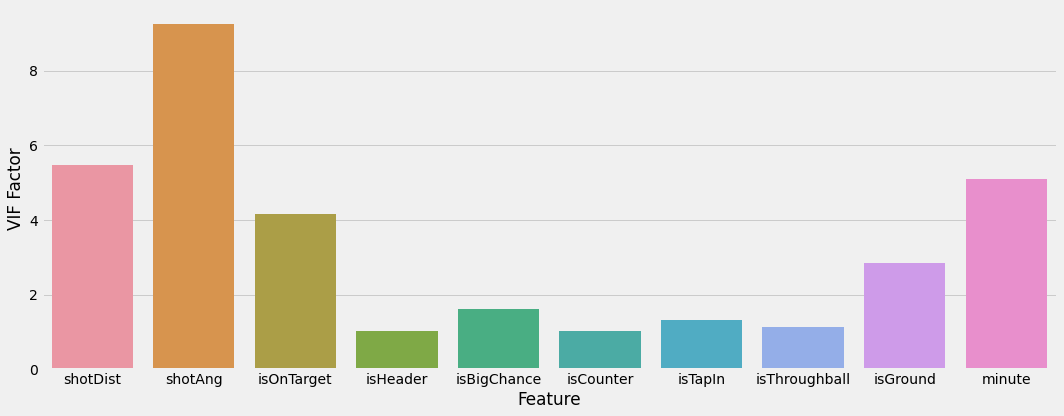

In [10]:
fig = plt.figure(figsize=(15,6))
sns.barplot(x='features',y='vif_factor',data=vif2)
plt.ylabel('VIF Factor')
plt.xlabel('Feature')
plt.tight_layout();
plt.savefig('vif_factor.png')

#### Correlations:

* With our predictor variables decided, we will look to see the relationships they share with a goal being scored.

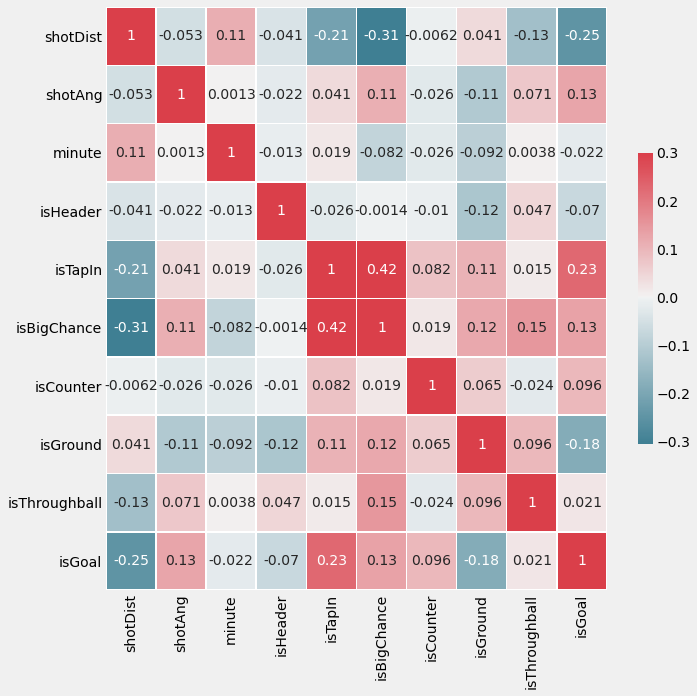

In [11]:
# Making a correlation heatmap.
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(xg1[['shotDist','shotAng','minute','isHeader','isTapIn','isBigChance','isCounter','isGround','isThroughball','isGoal']].corr(),ax=ax,annot=True,vmax=.3, center=0, cmap=cmap, linewidths=.5, cbar_kws={"shrink": .5});

#### Inference:

* Here, shot distance has the largest (negative) correlation factor. It shares a significant role in a shot turning into a goal as shots that are further away are tougher to aim, to generate power on, and hence, to score.
* Similarly, shot angle positively influences goal probability, i.e, a shot taken closer to 90 degrees has a stronger chance of turning into a goal than one taken from wider areas.
* The largest positive correlation factor is seen with tap-ins, which are shots taken from very close to goal (big chances) and are attempted first time. Interestingly enough, big chances themselves are scored at a lower rate than tap-ins, this means that the act of taking the shot with the first touch, influences the probability of a shot turning into a goal.
* Further, ground passes, headers, and shots taken later in the game all worsen the chances of shots turning into goals. Whereas, counter attacks and throughballs make the odds better.

### Step 3: Visual Feature Exploration.

In [12]:
from matplotlib.patches import Arc

In [20]:
# plotting shots on to a pitch

def pitch_creator(size=(10,7)):
    with plt.style.context('bmh'):
        fig = plt.figure(figsize=size)
        plt.axis([-0.5, 12.5, -0.5, 10.6])
        plt.grid(False)


        plt.plot([0, 0], [-0.2, 10.2], color='black')
        plt.plot([11.5, 11.5], [-0.2, 10.2], color="black")
        plt.plot([0, 11.5], [-0.2, -0.2], color='black')
        plt.plot([0, 11.5], [10.2, 10.2], color='black')

        centreCircle = plt.Circle((0, 5.05), 1, color='black', fill=False)

        # right penalty area
        plt.plot([11.5, 10], [2, 2], color='black')
        plt.plot([10, 10], [2, 8], color='black')
        plt.plot([10, 11.5], [8, 8], color='black')

        # right six yard box
        plt.plot([11.5, 11], [4, 4], color='black')
        plt.plot([11, 11], [4, 6], color='black')
        plt.plot([11, 11.5], [6, 6], color='black')


        # right goal posts
        plt.plot([11.5, 11.7], [4.5, 4.5], color='black')
        plt.plot([11.5, 11.7], [5.5, 5.5], color='black')
        plt.plot([11.7, 11.7], [4.5, 5.5], color='black')


        # right Arc
        rightArc = Arc((10.55, 5.05), height=1.83, width=1.83, angle=0,
                       theta1=130, theta2=230, color='black')

        ax = plt.gca()
        ax.add_patch(centreCircle)
        ax.add_patch(rightArc)
        ax.set_ylim(ax.get_ylim()[::-1])
        return fig

def plotter(fig,loc_list,hue,label):
    
    loc_x=[]
    loc_y=[]
    for loc in loc_list:
        loc_x.append(loc[0])
        loc_y.append(loc[1])
            
#     cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(loc_x,loc_y, gridsize=15, alpha = 0.7, color = hue, cmap=cmap)
#     plt.scatter(loc_x,loc_y,alpha=1,label=label,edgecolor='black',linewidth=0.5)
    plt.axis('off')
    
    
    return fig

In [14]:
def goal_creator(size=(10,7)):
    with plt.style.context('bmh'):
        fig = plt.figure(figsize=size)
        plt.axis([-1, 8, 0, 5.5])
        plt.grid(True)

        plt.plot([0.35, 0.35], [0.5, 4.7], color='black')
        plt.plot([6.65, 6.65], [0.5, 4.7], color="black")
        plt.plot([0.34, 6.65], [0.5, 0.5], color='black')
        #plt.plot([0, 7], [4.2, 4.2], color='black')
        
        ax = plt.gca()
        ax.set_ylim(ax.get_ylim()[::-1])
        return fig
    
def goal_creator1(size=(10,7)):
    with plt.style.context('bmh'):
        fig = plt.figure(num=2, figsize=(20,7))
        plt.axis([-1, 18, 0, 5.5])
        plt.grid(True)

        plt.plot([0.35, 0.35], [0.5, 4.7], color='black')
        plt.plot([6.65, 6.65], [0.5, 4.7], color="black")
        plt.plot([0.35, 6.65], [0.5, 0.5], color='black')

        plt.plot([10.35, 10.35], [0.5, 4.7], color='black')
        plt.plot([16.65, 16.65], [0.5, 4.7], color="black")
        plt.plot([10.35, 16.65], [0.5, 0.5], color='black')


        #plt.plot([0, 7], [4.2, 4.2], color='black')

        ax = plt.gca()
        ax.set_ylim(ax.get_ylim()[::-1])
        return fig

    
def goalplotter(fig,loc_list,color,label):
    
    loc_x=[]
    loc_y=[]
    loc_x1=[]
    for loc in loc_list:
        loc_x.append(loc[0])
        loc_y.append(loc[1])
    for i in loc_x:
        val = i+10
        loc_x1.append(val)
            
#     plt.scatter(loc_x1,loc_y,alpha=1,label=label,edgecolor='black',linewidth=0.5)
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(loc_x1,loc_y, gridsize=15, cmap=cmap)
    plt.axis('off')
    
    
    return fig

def goalplotter1(fig,loc_list,color,label):
    
    loc_x=[]
    loc_y=[]
    for loc in loc_list:
        loc_x.append(loc[0])
        loc_y.append(loc[1])
            
#     plt.scatter(loc_x,loc_y,alpha=1,label=label,edgecolor='black',linewidth=0.5)
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(loc_x,loc_y, gridsize=15, cmap=cmap, label=label)
    plt.axis('off')
    
    
    return fig

ValueError: Invalid RGBA argument: 'isGoal'

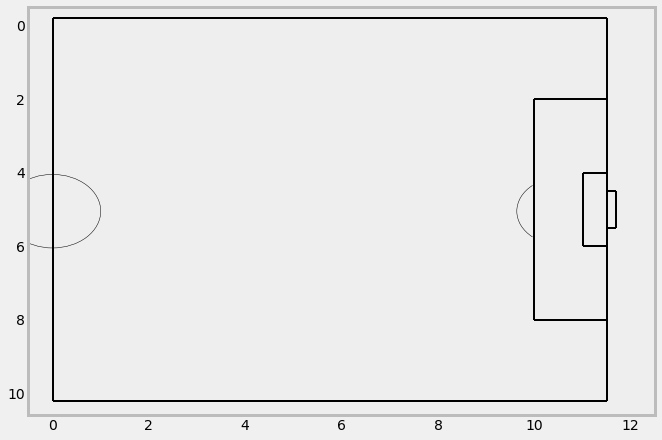

In [22]:
#plotting all data
plt1 = pitch_creator()
plt1 = plotter(plt,xg[['shotY','shotX']].values,xg[['isGoal']],'shots')
# plt2 = plotter(plt,xg[xg['isGoal']==1][['shotY','shotX']].values,'red','goals')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('pitchmap.png')
dftest = xg[xg['isGoal']==1]
print("The average shot distance is {}m, while the average angle is {}".format(round(xg.shotDist.mean(),2),round(xg.shotAng.mean(),2)),chr(176),'.',sep='')
print("The average distance of goals is {}m, while the average angle is {}".format(round(dftest.shotDist.mean(),2),round(dftest.shotAng.mean(),2)),chr(176),'.',sep='')

### Inference:

* We can see that as shots get further and wider, their frequency and goal probability both seem to take a dip.
* However, we also see that the furthest shots all turned into a goal. Why? This could be because of how the information is collected, i.e, generally attempts from that far away are considered to be failed passes, however if they end up in goal, they cannot be tagged as passes and hence we see a near perfect coversion rate from really far away.

ValueError: 'face' is neither a valid single color nor a color sequence consisting of single character color specifiers such as 'rgb'. Note also that the latter is deprecated.

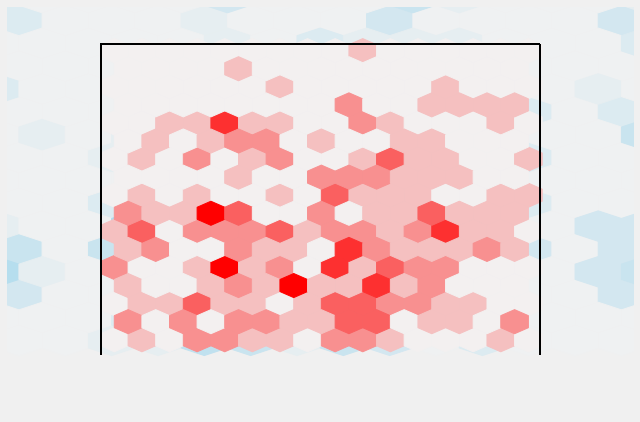

In [16]:
#plotting all data
plt1 = goal_creator()
plt1 = goalplotter1(plt,xg1['goalLoc2'].values,'skyblue','shots')
plt1 = goalplotter1(plt,xg1[xg1['isGoal']==1]['goalLoc2'].values,'red','goals')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('goalmap.png')
print("The probability of any shot turning into a goal is {}".format(round(xg.isGoal.mean()*100,2)),"%.")

### Inference:

* We can observe here that, the shots are more densely packed on the bottom half of the goal, and that very few shots made it to the top corners. The probability of goals being scored however seem to be the even/random throughout.

In [ ]:
# plotting headers vs footed shots

plt1 = pitch_creator()
plt1 = plotter(plt,xg[['shotY','shotX']].values,'skyblue','foot')
plt1 = plotter(plt,xg[xg['isHeader']==1][['shotY','shotX']].values,'red','head')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('pitchmapHead.png')
dftest = xg[xg['isHeader']==1]
print("The average distance of headers from goal is {}m, while the average angle is {}".format(round(dftest.shotDist.mean(),2),round(dftest.shotAng.mean(),2)),chr(176),'.',sep='')
dftest = xg[xg['isHeader']==0]
print("The average distance of foot shots from goal is {}m, while the average angle is {}".format(round(dftest.shotDist.mean(),2),round(dftest.shotAng.mean(),2)),chr(176),'.',sep='')

In [ ]:
#plotting head vs foot shots data on the goalface
plt1 = goal_creator1()
plt1 = goalplotter1(plt,xg1[xg1['isHeader']==1]['goalLoc2'].values,'skyblue','no goal')
plt1 = goalplotter1(plt,xg1[(xg1['isHeader']==1) & (xg1['isGoal']==1)]['goalLoc2'].values,'red','goal')
plt1 = goalplotter(plt,xg1[xg1['isHeader']==0]['goalLoc2'].values,'skyblue','')
plt1 = goalplotter(plt,xg1[(xg1['isHeader']==0) & (xg1['isGoal']==1)]['goalLoc2'].values,'red','')
plt.legend(loc='upper right')
plt.title('Headers (left) vs Footed Shots (right)')
# plt.show()
plt.savefig('goalmapHead.png')
dftest = xg[xg['isHeader']==1]
print("The probability of a header turning into a goal is {}".format(round(dftest.isGoal.mean()*100,2)),"%.")
dftest = xg[xg['isHeader']==0]
print("The probability of a foot shot turning into a goal is {}".format(round(dftest.isGoal.mean()*100,2)),"%.")

### Inference: 

* Headers are attempted very rarely, when compared to foot shots.
* Headers in general are taken from significantly closer to the goal, and the difference between the average angles is also insignificant.
* This could indiciate that the act of scoring a header, is tough and that could also be the reason for the rare number of attempts.

In [ ]:
# plotting shots resulting ground and aerial passes

plt1 = pitch_creator()
plt1 = plotter(plt,xg[['shotY','shotX']].values,'skyblue','aerial')
plt1 = plotter(plt,xg[xg['isGround']==1][['shotY','shotX']].values,'red','ground')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('pitchmapPass.png')
dftest = xg[xg['isGround']==1]
print("The average distance of shots originating from a ground pass is {}m, while the average angle is {}".format(round(dftest.shotDist.mean(),2),round(dftest.shotAng.mean(),2)),chr(176),'.',sep='')
dftest = xg[xg['isGround']==0]
print("The average distance of shots originating from an aerial pass is {}m, while the average angle is {}".format(round(dftest.shotDist.mean(),2),round(dftest.shotAng.mean(),2)),chr(176),'.',sep='')

In [ ]:
# plotting shots resulting ground and aerial passes on the goalface
plt1 = goal_creator1()
plt1 = goalplotter1(plt,xg1[xg1['isGround']==1]['goalLoc2'].values,'skyblue','no goal')
plt1 = goalplotter1(plt,xg1[(xg1['isGround']==1) & (xg1['isGoal']==1)]['goalLoc2'].values,'red','goal')
plt1 = goalplotter(plt,xg1[xg1['isGround']==0]['goalLoc2'].values,'skyblue','')
plt1 = goalplotter(plt,xg1[(xg1['isGround']==0) & (xg1['isGoal']==1)]['goalLoc2'].values,'red','')
plt.legend(loc='upper right')
plt.title('Shots from Ground Passes (left) vs Shots from Aerial Passes (right)')
# plt.show()
plt.savefig('goalmapPass.png')
dftest = xg[xg['isGround']==1]
print("The probability of a shot originating from a ground pass turning into a goal is {}".format(round(dftest.isGoal.mean()*100,2)),"%.")
dftest = xg[xg['isGround']==0]
print("The probability of a shot originating from an aerial pass turning into a goal is {}".format(round(dftest.isGoal.mean()*100,2)),"%.")

### Inference:
* Shots from aerial passes are taken from closer to goal and from more central angles, on average.
* Aerial passes thus lead to better shots as we see that they are converted more often.
* A caveat to this however is that, this analysis only measures shots succesfully taken after aerial passes, the success rate of an aerial pass by itself, would need to be looked at in a different analysis.

In [ ]:
# plotting shots resulting from through and general passes

plt1 = pitch_creator()
plt1 = plotter(plt,xg[['shotY','shotX']].values,'skyblue','other')
plt1 = plotter(plt,xg[xg['isThroughball']==1][['shotY','shotX']].values,'red','throughball')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('pitchmapThru.png')
dftest = xg[xg['isThroughball']==1]
print("The average distance of shots originating from a through pass is {}m, while the average angle is {}".format(round(dftest.shotDist.mean(),2),round(dftest.shotAng.mean(),2)),chr(176),'.',sep='')
dftest = xg[xg['isThroughball']==0]
print("The average distance of shots originating from any other pass is {}m, while the average angle is {}".format(round(dftest.shotDist.mean(),2),round(dftest.shotAng.mean(),2)),chr(176),'.',sep='')

In [ ]:
#plotting head vs foot shots data on the goalface
plt1 = goal_creator1()
plt1 = goalplotter1(plt,xg1[xg1['isThroughball']==1]['goalLoc2'].values,'skyblue','no goal')
plt1 = goalplotter1(plt,xg1[(xg1['isThroughball']==1) & (xg1['isGoal']==1)]['goalLoc2'].values,'red','goal')
plt1 = goalplotter(plt,xg1[xg1['isThroughball']==0]['goalLoc2'].values,'skyblue','')
plt1 = goalplotter(plt,xg1[(xg1['isThroughball']==0) & (xg1['isGoal']==1)]['goalLoc2'].values,'red','')
plt.title('Shots from Through Passes (left) vs Shots from Other Passes (right)')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('goalmapThru.png')
dftest = xg[xg['isThroughball']==1]
print("The probability of a shot originating from a through pass turning into a goal is {}".format(round(dftest.isGoal.mean()*100,2)),"%.")
dftest = xg[xg['isThroughball']==0]
print("The probability of a shot originating from any other pass turning into a goal is {}".format(round(dftest.isGoal.mean()*100,2)),"%.")